# Predicciones

In [ ]:
import numpy as np 
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#Importamos los datasets

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

In [ ]:
dataset_hotels_train.drop(['reservation_status_date'], axis='columns', inplace=True) 
dataset_hotels_test.drop(['reservation_status_date'], axis='columns', inplace=True) 

# Preprocesamiento

In [ ]:
dataset_hotels_test_id = dataset_hotels_test['id'].copy()

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna(0).astype('int').astype('str')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna(0).astype('int').astype('str')

In [ ]:
dataset_hotels_train.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_train['cant_personas'] = dataset_hotels_train['children'].fillna(0) + dataset_hotels_train['adults'].fillna(0) + dataset_hotels_train['babies'].fillna(0)
dataset_hotels_train.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['cant_personas'] = dataset_hotels_test['children'].fillna(0) + dataset_hotels_test['adults'].fillna(0) + dataset_hotels_test['babies'].fillna(0)
dataset_hotels_test.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('ninguno')

In [ ]:
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('ninguno')

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('desconocida')

In [ ]:
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('desconocida')

In [ ]:
dataset_hotels_train.dtypes

hotel                           object
lead_time                        int64
stays_in_week_nights             int64
country                         object
market_segment                  object
distribution_channel            object
previous_cancellations           int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                           object
company                         object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
cant_personas                  float64
dtype: object

In [ ]:
dataset_hotels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        61913 non-null  object 
 1   lead_time                    61913 non-null  int64  
 2   stays_in_week_nights         61913 non-null  int64  
 3   country                      61692 non-null  object 
 4   market_segment               61913 non-null  object 
 5   distribution_channel         61913 non-null  object 
 6   previous_cancellations       61913 non-null  int64  
 7   reserved_room_type           61913 non-null  object 
 8   assigned_room_type           61913 non-null  object 
 9   booking_changes              61913 non-null  int64  
 10  deposit_type                 61913 non-null  object 
 11  agent                        61913 non-null  object 
 12  company                      61913 non-null  object 
 13  days_in_waiting_

Generamos One hot Encodig para la variable hotel

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['hotel'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['hotel'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['hotel'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['hotel'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable market_segment

In [ ]:
lista_market_segment_mayoritarios = dataset_hotels_train['market_segment'].value_counts().nlargest(5).index.tolist()
lista_market_segment_mayoritarios

['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate']

In [ ]:
dataset_hotels_train['market_segment'] = pd.Series(np.where(~dataset_hotels_train['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_train['market_segment']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['market_segment'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['market_segment'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test['market_segment'] = pd.Series(np.where(~dataset_hotels_test['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_test['market_segment']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['market_segment'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['market_segment'], axis='columns', inplace=True)

Genero One hot Encodig para la variable distribution_channel

In [ ]:
dataset_hotels_train['distribution_channel']= dataset_hotels_train['distribution_channel'].replace('Direct','direct_channel')
dataset_hotels_test['distribution_channel']= dataset_hotels_test['distribution_channel'].replace('Direct','direct_channel')

In [ ]:
lista_distribution_channel_mayoritarios = dataset_hotels_train['distribution_channel'].value_counts().nlargest(3).index.tolist()
lista_distribution_channel_mayoritarios

['TA/TO', 'direct_channel', 'Corporate']

In [ ]:
dataset_hotels_train['distribution_channel'] = pd.Series(np.where(~dataset_hotels_train['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_train['distribution_channel']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['distribution_channel'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['distribution_channel'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_test['distribution_channel'] = pd.Series(np.where(~dataset_hotels_test['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_test['distribution_channel']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['distribution_channel'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['distribution_channel'], axis='columns', inplace=True)

Genero One hot Encodig para la variable reserved_room_type



In [ ]:
dataset_hotels_train['reserved_room_type']

0        D
1        A
2        F
3        A
4        A
        ..
61908    A
61909    A
61910    A
61911    A
61912    D
Name: reserved_room_type, Length: 61913, dtype: object

Genero One hot Encodig para la variable assigned_room_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['assigned_room_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['assigned_room_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['assigned_room_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['assigned_room_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable deposit_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['deposit_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['deposit_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['deposit_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['deposit_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable customer_type

In [ ]:
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['customer_type'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['customer_type'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['customer_type'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['customer_type'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable agent

In [ ]:
lista_agent_mayoritarios = dataset_hotels_train['agent'].value_counts().nlargest(9).index.tolist()
lista_agent_mayoritarios

['9', '0', '240', '1', '14', '6', '7', '250', '241']

In [ ]:
dataset_hotels_train['agent'] = pd.Series(np.where(~dataset_hotels_train['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_train['agent']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['agent'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['agent'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['agent'] = pd.Series(np.where(~dataset_hotels_test['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_test['agent']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['agent'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['agent'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable company

<Axes: >

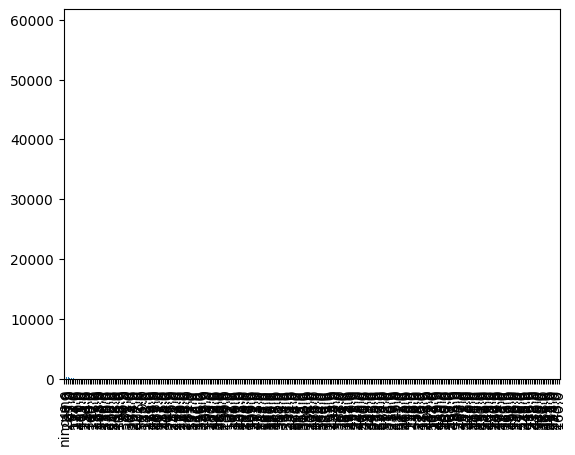

In [ ]:
dataset_hotels_train['company'].value_counts().plot(kind = 'bar')

In [ ]:
lista_company_mayoritarios = dataset_hotels_train['company'].value_counts().nlargest(1).index.tolist()
lista_company_mayoritarios

['ninguno']

In [ ]:
dataset_hotels_train['company'] = pd.Series(np.where(~dataset_hotels_train['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_train['company']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['company'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['company'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['company'] = pd.Series(np.where(~dataset_hotels_test['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_test['company']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['company'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['company'], axis='columns', inplace=True) 

Genero One hot encoding para la variable Country, como son muchos paises y para no saturar de dimensiones los datos agrupo los paises minoritarios en una nueva categoria

<Axes: >

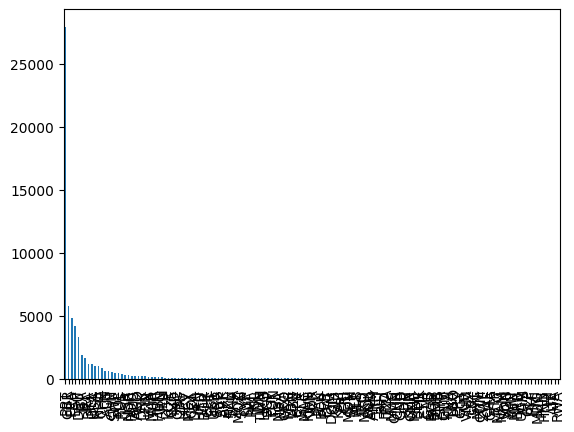

In [ ]:
dataset_hotels_train['country'].value_counts().plot(kind = 'bar')

In [ ]:
lista_paises_mayoritarios = dataset_hotels_train['country'].value_counts().nlargest(10).index.tolist()
lista_paises_mayoritarios

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA']

In [ ]:
dataset_hotels_train['country'] = pd.Series(np.where(~dataset_hotels_train['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_train['country']))
dataset_hotels_train = pd.concat([dataset_hotels_train, pd.get_dummies(dataset_hotels_train['country'], drop_first=True )], axis=1)
dataset_hotels_train.drop(['country'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_test['country'] = pd.Series(np.where(~dataset_hotels_test['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_test['country']))
dataset_hotels_test = pd.concat([dataset_hotels_test, pd.get_dummies(dataset_hotels_test['country'], drop_first=True )], axis=1)
dataset_hotels_test.drop(['country'], axis='columns', inplace=True) 

In [ ]:
list_columns = dataset_hotels_test.columns.to_list()

In [ ]:
dataset_hotels_test.columns.symmetric_difference(dataset_hotels_train.columns)

Index(['L', 'is_canceled'], dtype='object')

In [ ]:
dataset_hotels_test['L'] = np.uint8(0)

In [ ]:
dataset_hotels_train.columns.symmetric_difference(dataset_hotels_test.columns)

Index(['is_canceled'], dtype='object')

In [ ]:
dataset_hotels_train = dataset_hotels_train.reindex(sorted(dataset_hotels_train.columns), axis=1)
dataset_hotels_test = dataset_hotels_test.reindex(sorted(dataset_hotels_test.columns), axis=1)

PREPROCESAMIENTO HECHO

In [ ]:
ds_hotels_y = dataset_hotels_train['is_canceled'].copy()

# Solo deja las columnas numericas
dataset_hotels_train = dataset_hotels_train.select_dtypes(include='number')

# Agarra el resto
ds_hotels_x = dataset_hotels_train.drop(['is_canceled'], axis='columns', inplace=False) 

In [ ]:
# {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 8}; 0.8667527153266164

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [ ]:
#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini'],
               'min_samples_leaf':[7],
               'min_samples_split': [7],
               'ccp_alpha':[1e-06], 
               'max_depth':[19]}

In [ ]:
from sklearn.model_selection import GridSearchCV


#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini'],
               'min_samples_leaf':[7],
               'min_samples_split': [7],
               'ccp_alpha':[1e-06], 
               'max_depth':[19]}
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#GridSearch CV
gridcv = GridSearchCV(estimator=base_tree ,
                      param_grid=params_grid,
                      scoring=scorer_fn,
                      cv=kfoldcv,
                      return_train_score='True', 
                      verbose=1) 

gridcv.fit(ds_hotels_x,ds_hotels_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1e-06], 'criterion': ['gini'],
                         'max_depth': [19], 'min_samples_leaf': [7],
                         'min_samples_split': [7]},
             return_train_score='True', scoring=make_scorer(f1_score),
             verbose=1)

In [ ]:
#Mejores hiperparametros del arbol
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)
print(gridcv.best_estimator_)

{'ccp_alpha': 1e-06, 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 7}
0.8395176947967862
DecisionTreeClassifier(ccp_alpha=1e-06, max_depth=19, min_samples_leaf=7,
                       min_samples_split=7)


In [ ]:
#Importancia y reglas del Árbol con mejor Performance
from sklearn.tree import export_text
arbol=DecisionTreeClassifier().set_params(**gridcv.best_params_)
arbol.fit(ds_hotels_x,ds_hotels_y)

reglas = export_text(arbol, feature_names=ds_hotels_x.columns.to_list())
print(reglas)

|--- Non Refund <= 0.50
|   |--- lead_time <= 11.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- PRT <= 0.50
|   |   |   |   |   |--- 9 <= 0.50
|   |   |   |   |   |   |--- previous_cancellations <= 0.50
|   |   |   |   |   |   |   |--- 14 <= 0.50
|   |   |   |   |   |   |   |   |--- 240 <= 0.50
|   |   |   |   |   |   |   |   |   |--- otro distribution channel <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- cant_personas <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- cant_personas >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- otro distribution channel >  0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 5.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  5.50
|   |   |   |   |   |

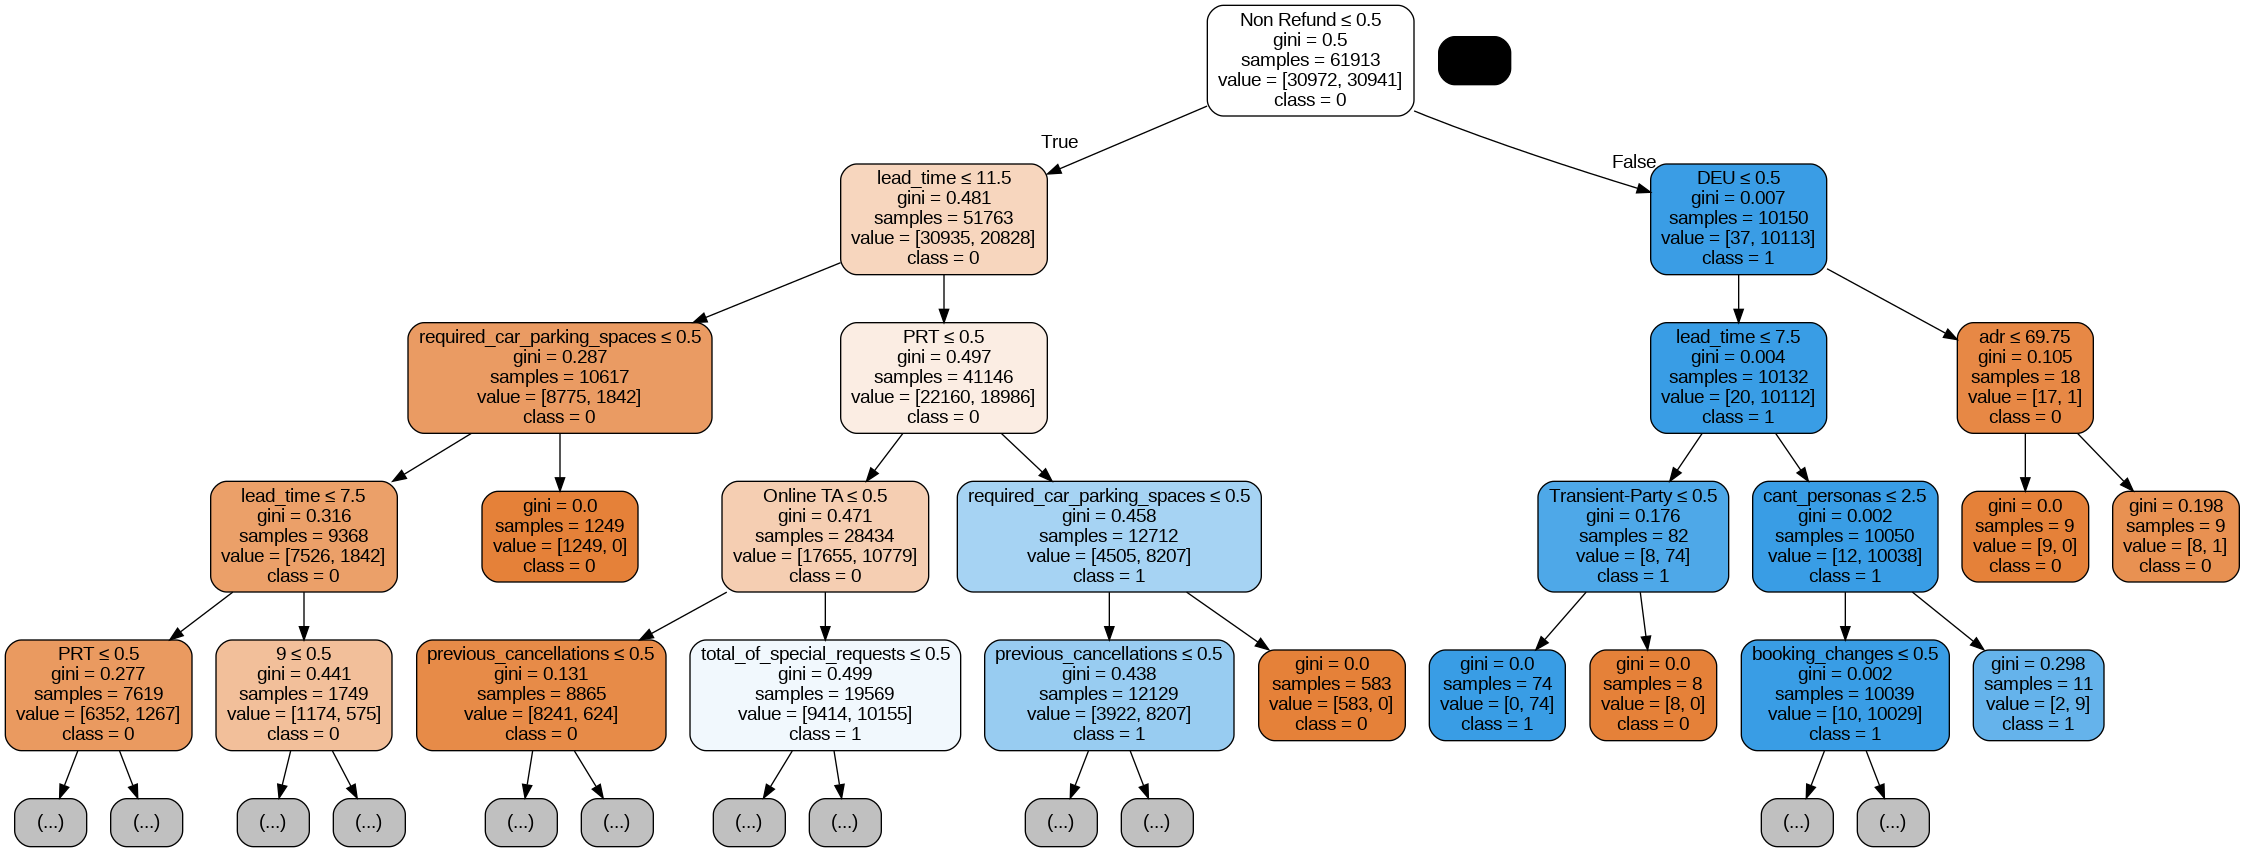

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=ds_hotels_x.columns,
                class_names=['0','1'],
                max_depth = 4)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- En la primera decision nuestro modelo de arbol decide por la categoria es Non Refound o no perteneciente al tipo de pago, cuando es 1 la reserva es totalmente cancelada esos se observa al tener una impureza de gini de 0.5
- Para la segunda desicion para el grupo que no tiene tipo de pago Non Refound se toma en cuenta el tiempo de espera de la reserva si es menor o igual a 11,5 con una impureza de gini de 0.481 para elegir esta variable y dividir al subconjunto y para el caso que el tipo de pago si es Non Refound pregunta si la reserva pertenece al pais DEU, es decir Alemania, con una impureza de Gini de 0.007 es decir muy baja al volver a dividir, quedando bastante caracterizada ya por estas 2 preguntas

F1-Score: 0.8760270278844018


Text(50.722222222222214, 0.5, 'True')

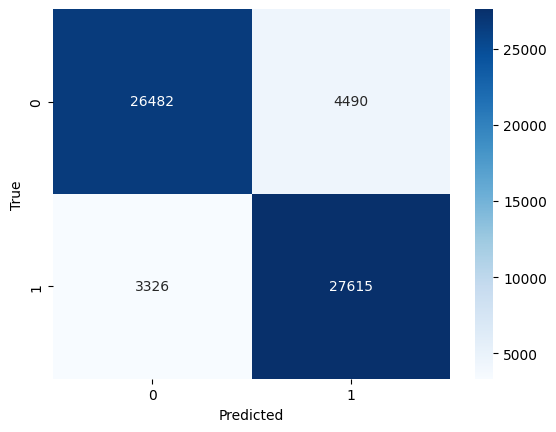

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= gridcv.predict(ds_hotels_x)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(ds_hotels_y, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(ds_hotels_y,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

- El Precision mide cuántos de los casos que el modelo ha identificado como positivos son realmente verdaderos positivos.

- La accuracy mide la cantidad de instancias que el modelo ha clasificado correctamente como positivas o negativas en relación al total de instancias.

- El recall mide cuántos de los casos positivos totales fueron realmente identificados por el modelo.

- El f1score combina tanto la precisión como el recall.


In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(ds_hotels_y,y_pred)
recall=recall_score(ds_hotels_y,y_pred)
f1=f1_score(ds_hotels_y,y_pred,)
precision=precision_score(ds_hotels_y,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8737583383134399
Recall: 0.8925050903332148
Precision: 0.860146394642579
f1 score: 0.8760270278844018


In [ ]:
from joblib import dump, load
dump(arbol, 'tree_model.joblib')

['tree_model.joblib']

#Export TEST to KAGGLE

In [ ]:
dataset_hotels_test.drop(['reserved_room_type'], axis='columns', inplace=True) 

In [ ]:
gridcv.predict(dataset_hotels_test)

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
df_prediction = pd.DataFrame(zip(dataset_hotels_test_id,gridcv.predict(dataset_hotels_test))).rename(columns={0: "id", 1: "is_canceled"})
df_prediction

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [ ]:
df_prediction.to_csv('entrega_prediction.csv', index=False)